# importação

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import ipywidgets as widgets
import matplotlib.pyplot as plt
import warnings

from datetime import datetime
from ipywidgets import fixed
from IPython.core.display import HTML #para a função jupyter_settings

warnings.filterwarnings('ignore') #ignora mensagens de warning 


In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [3]:
plt.style.use('science')

In [4]:
# função do jupyter para auxiliar plotagens 
def jupyter_settings():

    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'

    plt.style.use('science')
    plt.rcParams['figure.figsize'] = [8, 5]
    plt.rcParams['font.size'] = 15

    display(HTML('<style>.container { width:70% !important; }</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.4f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
    #sns.set()
    
    return None

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# Carregando os dados

In [5]:
data = pd.read_csv('kc_house_data.csv')

In [6]:
# entendo os dados 
print('Quantidade de linhas: {}\n'.format(data.shape[0]))

print('Quantidade de colunas: {}\n'.format(data.shape[1]))

print('Nome das colunas: \n{}'.format(data.columns))

Quantidade de linhas: 21613

Quantidade de colunas: 21

Nome das colunas: 
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
# tipos dos dados
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# converção de date para o formato de data
data['date'] = pd.to_datetime(data['date'])

In [9]:
# checando se há dados duplicados 
data.duplicated().unique()

array([False])

In [10]:
# checando dados NA (se tiver algum valor NA ocorre True)
data.isnull().values.any()

False

# Criando novas colunas

In [11]:
# criando coluna mês do ano 
data['month'] = data['date'].dt.month

# criando coluna renovated
data['renovated'] = data['yr_renovated'].apply(lambda x: 'yes' if x>0 else 'no')

# criando coluna das estações do ano segundo o hemisferio norte
data['sesson'] = data['month'].apply(lambda x: 'spring' if 3<=x<=5 else
                                               'summer' if 6<=x<=8 else
                                               'fall' if 9<=x<=11 else 
                                               'winter')



In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,sesson
0,7129300520,2014-10-13,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,10,no,fall
1,6414100192,2014-12-09,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,12,yes,winter
2,5631500400,2015-02-25,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,2,no,winter
3,2487200875,2014-12-09,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,12,no,winter
4,1954400510,2015-02-18,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,2,no,winter


# Estatística descritiva

In [13]:
# cópia dos dados 
data_copy = data.copy()

# dropando a coluna com quartos = 33
data_copy = data_copy.drop(15870)

# verificando com os tipos de variaveis
data_copy.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
renovated                object
sesson                   object
dtype: object

In [14]:
# trabalhando apenas com as variaveis inteiros
data_num = data_copy.select_dtypes(include = ['int64', 'float64'])

#deletando a coluna ID 
data_num = data_num.iloc[:, 1: ]

In [15]:
# estatistica descritiva
data_num_mean = pd.DataFrame(data_num.apply(np.mean)).T
data_num_median = pd.DataFrame(data_num.apply(np.median)).T
data_num_std = pd.DataFrame(data_num.apply(np.std)).T
data_num_max = pd.DataFrame(data_num.apply(np.max)).T
data_num_min = pd.DataFrame(data_num.apply(np.min)).T

# concatenando em um mesmo data frame

data_descr = pd.concat([data_num_mean, data_num_median, data_num_std, data_num_max, data_num_min]).T.reset_index()

In [16]:
# renomeando as colunas
data_descr.columns = ['attributes', 'mean', 'median', 'std', 'max', 'min']

data_descr.head()

,attributes,mean,median,std,max,min
0,price,"540,083.5188","450,000.0000","367,126.5674","7,700,000.0000","75,000.0000"
1,bedrooms,3.3695,3.0000,0.9080,11.0000,0.0000
2,bathrooms,2.1148,2.2500,0.7702,8.0000,0.0000
3,sqft_living,"2,079.9210","1,910.0000",918.4356,"13,540.0000",290.0000
4,sqft_lot,"15,107.3890","7,619.0000","41,420.4652","1,651,359.0000",520.0000


# Hipóteses e Insights

        H1 = Imóveis com vista para água são em média 30% mais caros
        H2 = Imóveis nunca reformados são 15% mais baratos na média 
        H3 = A estação summer apresenta preços 30% mais caros na média que as outras estações do ano
        H4 = Os imóveis com vista para água na estação summer são 40% na média mais caros que os com vista para aguá no winter 
        H5 = O preço dos imóveis crescem 10% MoM na média 

In [17]:
data_copy.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated,sesson
0,7129300520,2014-10-13,"221,900.0000",3,1.0000,1180,5650,1.0000,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.2570,1340,5650,10,no,fall
1,6414100192,2014-12-09,"538,000.0000",3,2.2500,2570,7242,2.0000,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.3190,1690,7639,12,yes,winter
2,5631500400,2015-02-25,"180,000.0000",2,1.0000,770,10000,1.0000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.2330,2720,8062,2,no,winter
3,2487200875,2014-12-09,"604,000.0000",4,3.0000,1960,5000,1.0000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.3930,1360,5000,12,no,winter
4,1954400510,2015-02-18,"510,000.0000",3,2.0000,1680,8080,1.0000,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.0450,1800,7503,2,no,winter


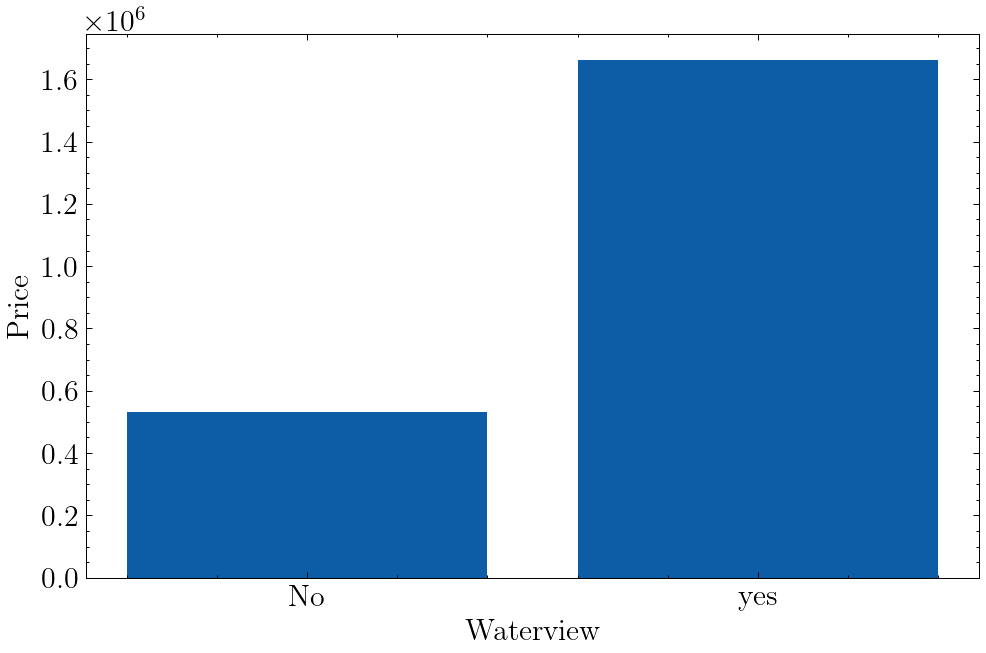

In [18]:
# testando a H1
h1 = data_copy[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

#gráfico 

plt.ylabel('Price')
plt.xlabel('Waterview')
plt.bar(['No', 'yes'], h1['price']);


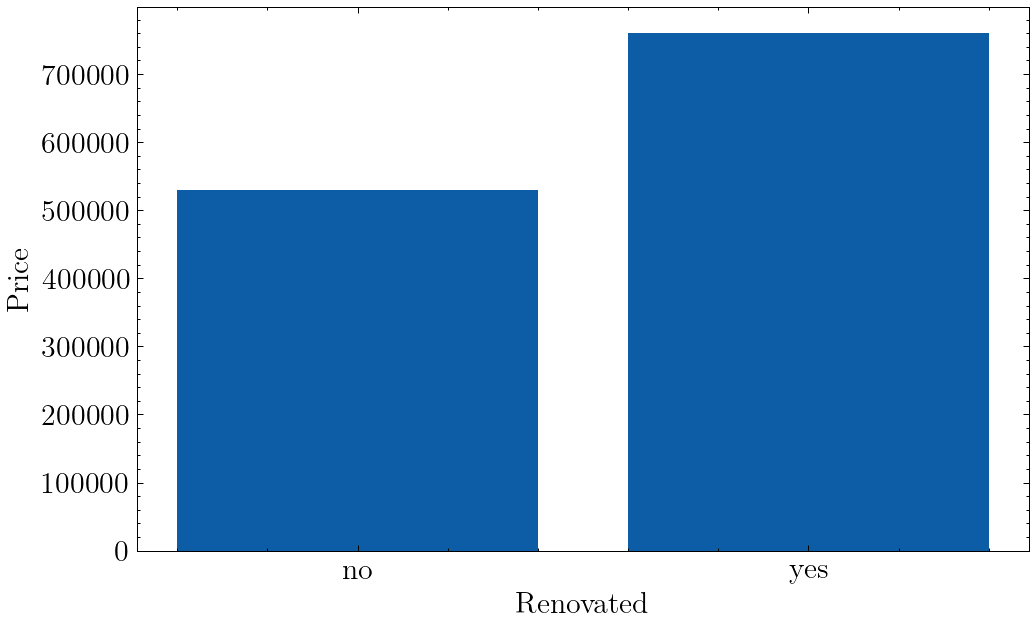

In [19]:
# testando a H2
h2 = data_copy[['price', 'renovated']].groupby('renovated').mean().reset_index()

#gráfico 
plt.ylabel('Price')
plt.xlabel('Renovated')
plt.bar(h2['renovated'], h2['price']);

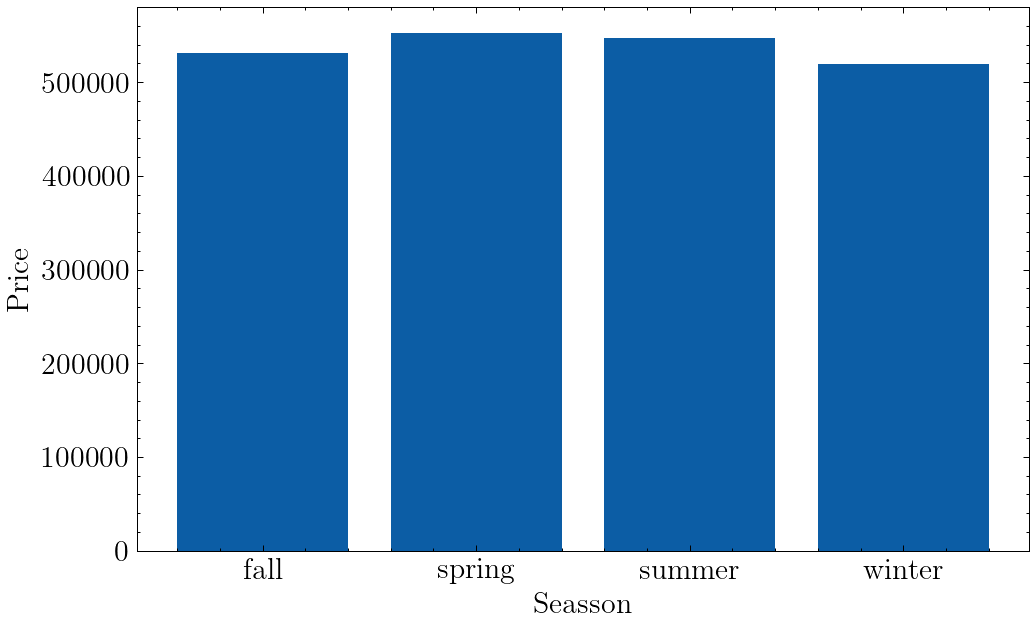

In [20]:
# testando a H3
h3 = data_copy[['price', 'sesson']].groupby('sesson').mean().reset_index()

#gráfico 
plt.ylabel('Price')
plt.xlabel('Seasson')
plt.bar(h3['sesson'], h3['price']);

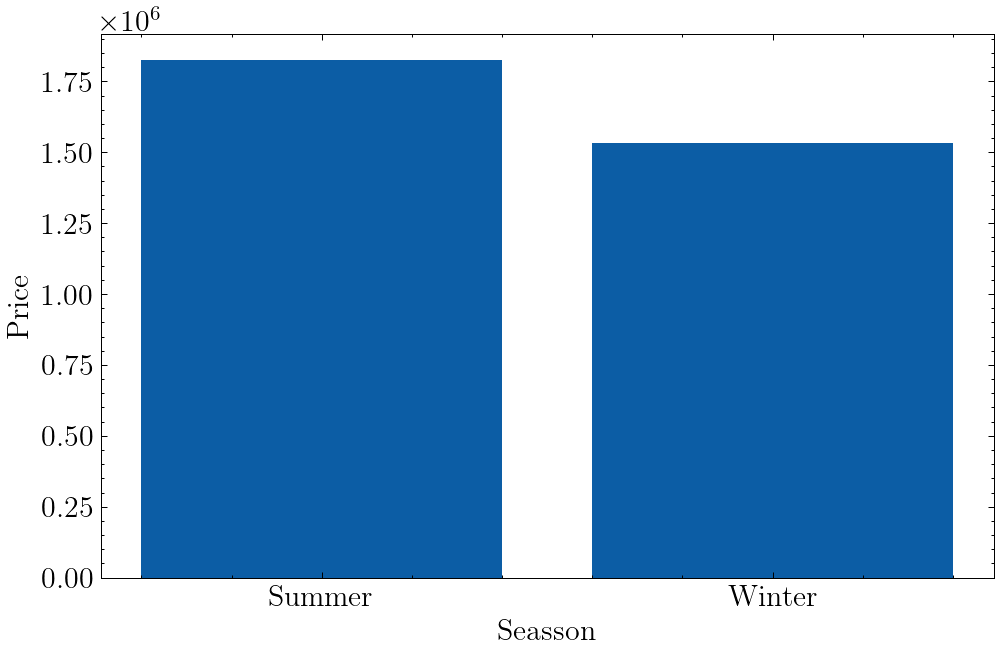

In [21]:
# testando a H4
df = data_copy.loc[data_copy['waterfront']==1, ['price', 'sesson']].reset_index()
h4 = df[['price', 'sesson']].groupby('sesson').mean().reset_index()

# selecionando só winter e summer do dataframe h4
h4_ = h4.loc[ (h4['sesson']=='summer') | (h4['sesson']=='winter'), 'price'].reset_index()

#gráfico 
plt.ylabel('Price')
plt.xlabel('Seasson')

plt.bar(['Summer', 'Winter'], h4_['price']);

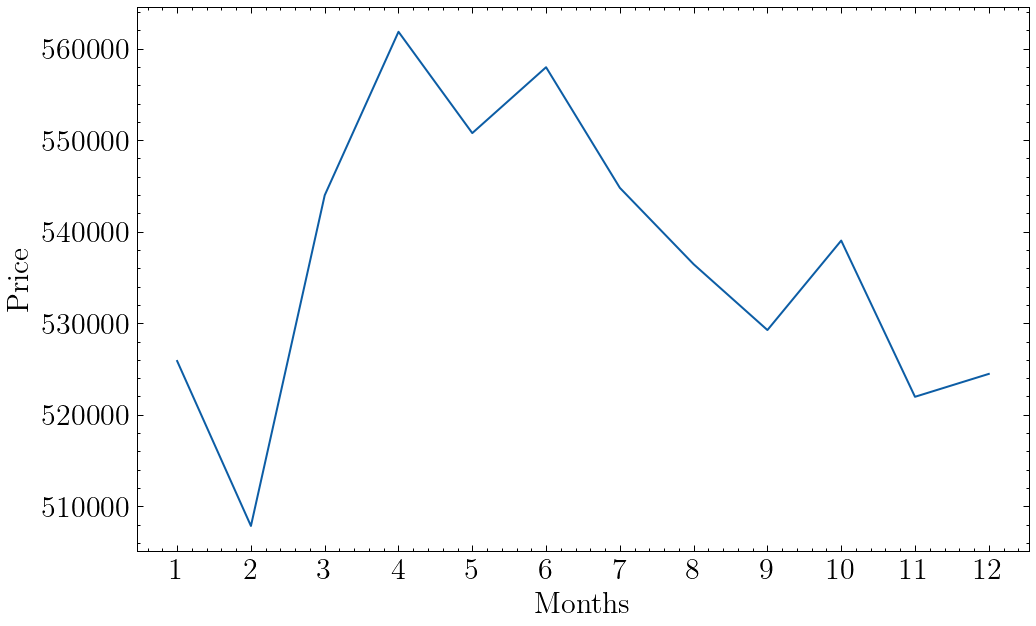

In [22]:
# testando a H5
h5 = data_copy[['price', 'month']].groupby('month').mean().reset_index()

#gráfico 
plt.ylabel('Price')
plt.xlabel('Months')
plt.xticks( [i+1 for i, _ in enumerate(h5['month'])], h5['month'])
plt.plot(h5['month'], h5['price']);

H1 e H2 são verdadeiras

# Respondendo as questões de negócio

In [23]:
# Quais são os imóveis que deveria comprar e por qual preço?

data_median = data_copy[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df = data_copy.copy()

df_merge = pd.merge(data_median, df, on='zipcode', how = 'inner')


In [24]:
df_merge.head()

,zipcode,price_x,id,date,price_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,renovated,sesson
0,98001,"260,000.0000",7895500070,2015-02-13,"240,000.0000",4,1.0000,1220,8075,1.0000,0,0,2,7,890,330,1969,0,47.3341,-122.2820,1290,7800,2,no,winter
1,98001,"260,000.0000",3717000160,2014-10-09,"287,000.0000",4,2.5000,2240,4648,2.0000,0,0,3,7,2240,0,2005,0,47.3378,-122.2570,2221,4557,10,no,fall
2,98001,"260,000.0000",8961960160,2014-10-28,"480,000.0000",4,2.5000,3230,16171,2.0000,0,3,3,9,2520,710,2001,0,47.3183,-122.2530,2640,8517,10,no,fall
3,98001,"260,000.0000",4014400292,2015-01-14,"465,000.0000",3,2.5000,2714,17936,2.0000,0,0,3,9,2714,0,2005,0,47.3185,-122.2750,2590,18386,1,no,winter
4,98001,"260,000.0000",1115450240,2014-10-22,"360,000.0000",4,2.5000,2160,9528,2.0000,0,0,3,9,2160,0,1992,0,47.3341,-122.2550,2280,9937,10,no,fall


In [25]:
# renomeando price_x e price_y
df_merge = df_merge.rename(columns = {'price_y' : 'price', 'price_x' : 'price_median'} )

In [74]:
# classificando os imoveis a serem comprados tenha preço menor que a mediana de cada regiao e estejam em boas condições
for i, row in df_merge.iterrows():
    if (row['price_median'] >= row['price']) & (row['condition'] > 3):
        df_merge.loc[i,'buy'] =  'yes'
        
    else:
        df_merge.loc[i, 'buy'] = 'no'
        
# salvando apenas as colunas que me interessa
data_resume = df_merge[['id', 'zipcode', 'price', 'price_median', 'condition','sesson', 'lat', 'long', 'buy']]

In [75]:
data_resume.head()

,id,zipcode,price,price_median,condition,sesson,lat,long,buy
0,7895500070,98001,"240,000.0000","260,000.0000",2,winter,47.3341,-122.2820,no
1,3717000160,98001,"287,000.0000","260,000.0000",3,fall,47.3378,-122.2570,no
2,8961960160,98001,"480,000.0000","260,000.0000",3,fall,47.3183,-122.2530,no
3,4014400292,98001,"465,000.0000","260,000.0000",3,winter,47.3185,-122.2750,no
4,1115450240,98001,"360,000.0000","260,000.0000",3,fall,47.3341,-122.2550,no


In [78]:
# plotando mapa onde as casas estão 

# criando um widgets para selecionar as casas do mapa para comprar ou nao
fil_zip = widgets.Dropdown(options = data_resume['buy'].unique().tolist(),
                       description = 'Buy',
                       disabled = False)


def  update_map (data, fil_zip):
    # selecionando apenas as colunas e criando um data set novo com essas colunas
    house = data_resume[(data_resume['buy'] == fil_zip)][['id', 'lat', 'long', 'condition', 'buy', 'price']] 

    # plotando o mapa
    mapa = px.scatter_mapbox(house, lat = 'lat', lon = 'long',  
                         size = 'price',
                         color = 'condition', opacity = 0.5, zoom = 10 )
    

    mapa.update_layout( mapbox_style = 'open-street-map')
    mapa.update_layout( height = 600, margin = {'b':0, 't':0, 'r':0, 'l': 0})
    mapa.show()
    
    return None
    
widgets.interactive( update_map, data = fixed(data_resume), fil_zip  = fil_zip)


interactive(children=(Dropdown(description='Buy', options=('no', 'yes'), value='no'), Output()), _dom_classes=…

In [63]:
# Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?
data_resume2 = data_resume.copy()

# selecionando apenas as linhas com buy = yes
data_resume2 = data_resume2[data_resume2['buy']=='yes']

# mediana do preço para cada estação dentro de cada zipcode
df_buy_sell = data_resume2[['sesson', 'zipcode', 'price']].groupby(['zipcode', 'sesson']).median().reset_index()

# juntando os dataset com as colunas do nosso interesse 
df_buy_sell_final = pd.merge(data_resume2, df_buy_sell, on='zipcode', how = 'inner')

# renomeando as colunas do dataset final 
df_buy_sell_final = df_buy_sell_final.rename(columns = {'price_x' : 'price', 'sesson_x': 'season', 'sesson_y': 'season_meadian', 'price_y':'price_median_season'} )

In [64]:
data_resume2.head(10)

,id,zipcode,price,price_median,condition,sesson,buy
6,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes
7,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes
10,7967200060,98001,"243,000.0000","260,000.0000",4,fall,yes
12,5066400483,98001,"249,900.0000","260,000.0000",4,fall,yes
17,3353400860,98001,"249,900.0000","260,000.0000",5,summer,yes
29,5402100045,98001,"189,950.0000","260,000.0000",4,spring,yes
39,5556800260,98001,"230,000.0000","260,000.0000",4,spring,yes
41,303000445,98001,"175,000.0000","260,000.0000",5,spring,yes
50,3750605349,98001,"210,500.0000","260,000.0000",5,spring,yes
58,2721049059,98001,"225,000.0000","260,000.0000",4,spring,yes


In [65]:
df_buy_sell.head(10)

,zipcode,sesson,price
0,98001,fall,"228,725.0000"
1,98001,spring,"212,750.0000"
2,98001,summer,"202,750.0000"
3,98001,winter,"231,500.0000"
4,98002,fall,"196,250.0000"
5,98002,spring,"206,500.0000"
6,98002,summer,"209,950.0000"
7,98002,winter,"189,000.0000"
8,98003,fall,"215,000.0000"
9,98003,spring,"230,000.0000"


In [66]:
df_buy_sell_final.head()

,id,zipcode,price,price_median,condition,season,buy,season_meadian,price_median_season
0,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,fall,"228,725.0000"
1,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,spring,"212,750.0000"
2,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,summer,"202,750.0000"
3,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,winter,"231,500.0000"
4,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,fall,"228,725.0000"


In [67]:
# estipulando o preço de venda para cada imóvel 
for i, row in df_buy_sell_final.iterrows():
    
    if (row['price_median_season'] > row['price']):
        df_buy_sell_final.loc[i, 'sale'] =  row['price'] * 1.1
        
    else:
        df_buy_sell_final.loc[i, 'sale'] = row['price'] * 1.3

In [68]:
df_buy_sell_final.head()

,id,zipcode,price,price_median,condition,season,buy,season_meadian,price_median_season,sale
0,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,fall,"228,725.0000","327,600.0000"
1,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,spring,"212,750.0000","327,600.0000"
2,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,summer,"202,750.0000","327,600.0000"
3,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,winter,"231,500.0000","327,600.0000"
4,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,fall,"228,725.0000","250,745.0000"


In [69]:
# calculo da coluna lucro
df_buy_sell_final['lucro'] = df_buy_sell_final['sale'] - df_buy_sell_final['price']

In [70]:
df_buy_sell_final.head(10)

,id,zipcode,price,price_median,condition,season,buy,season_meadian,price_median_season,sale,lucro
0,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,fall,"228,725.0000","327,600.0000","75,600.0000"
1,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,spring,"212,750.0000","327,600.0000","75,600.0000"
2,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,summer,"202,750.0000","327,600.0000","75,600.0000"
3,9262800171,98001,"252,000.0000","260,000.0000",4,spring,yes,winter,"231,500.0000","327,600.0000","75,600.0000"
4,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,fall,"228,725.0000","250,745.0000","22,795.0000"
5,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,spring,"212,750.0000","296,335.0000","68,385.0000"
6,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,summer,"202,750.0000","296,335.0000","68,385.0000"
7,3353401710,98001,"227,950.0000","260,000.0000",5,fall,yes,winter,"231,500.0000","250,745.0000","22,795.0000"
8,7967200060,98001,"243,000.0000","260,000.0000",4,fall,yes,fall,"228,725.0000","315,900.0000","72,900.0000"
9,7967200060,98001,"243,000.0000","260,000.0000",4,fall,yes,spring,"212,750.0000","315,900.0000","72,900.0000"


In [71]:
# lucro total para a empresa
df_buy_sell_final['lucro'].sum()

1300434878.8000002

Text(0.5, 0, 'Season')

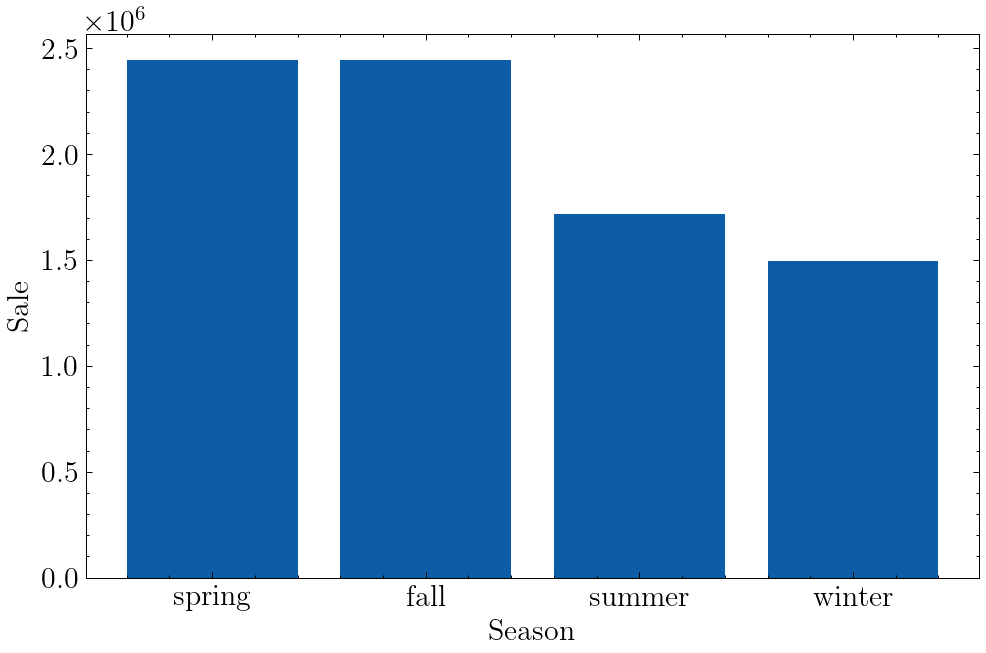

In [73]:
plt.bar(df_buy_sell_final['season'], df_buy_sell_final['sale']);
plt.ylabel('Sale')
plt.xlabel('Season')